In [ ]:
#Module 3 notes

In [2]:
import pandas as pd

xls = pd.ExcelFile('yelp.xlsx')
df = xls.parse('yelp_data') #copying data from excel sheet into df (1/3)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1


In [5]:
df_cities = xls.parse('cities') #copying date into excel sheet (2/3)
df_cities.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,id,city
0,1,Bellevue
1,2,Braddock
2,3,Carnegie
3,4,Homestead
4,5,Mc Kees Rocks


In [6]:
df_states = xls.parse('states') #copying excel sheet into df (3/3)
df_states.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,id,state
0,1,PA
1,2,NV


In [7]:
df = pd.merge(left=df, right=df_cities, how='inner', left_on='city_id', right_on='id')

In [8]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id,city
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue


In [8]:
df = pd.merge(left = df, right = df_states,how = 'inner', left_on = 'state_id',right_on = 'id')

In [10]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue,1,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue,1,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue,1,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue,1,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue,1,PA


In [9]:
del df['id_y'] #deletes column 
del df['id_x'] #deletes column

In [12]:
"""**********************QUERYING-DATA************************************"""
#The agg() method performs aggregate computations on the data in each group
#You can pass a list of aggregate functions as arguments

import numpy as np


In [10]:
df.groupby(['city']).agg([np.sum, np.mean, np.std])['stars']

/tmp/ipykernel_4672/4222212011.py:1: FutureWarning: ['name', 'category_0', 'category_1', 'state'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['city']).agg([np.sum, np.mean, np.std])['stars']


,sum,mean,std
city,,,
Bellevue,45.0,3.750000,0.783349
Braddock,9.5,4.750000,0.353553
Carnegie,76.0,3.454545,0.688495
Henderson,444.5,3.419231,0.906060
Homestead,134.5,3.280488,0.837024
Las Vegas,452.0,3.398496,1.042214
Mc Kees Rocks,37.0,3.700000,0.856349
Mount Lebanon,12.5,3.125000,1.108678
Munhall,12.0,3.000000,0.816497


In [11]:
"""********************************Pivot-Tables_Using-Index****************************************"""
#A pivot table is a useful data summarization tool that creates a new table form the contents in the DataFrame

pivot_city = pd.pivot_table(df,index=["city"])
print(type(pivot_city))
pivot_city

<class 'pandas.core.frame.DataFrame'>


/tmp/ipykernel_4672/2863145866.py:4: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_city = pd.pivot_table(df,index=["city"])


,city_id,review_count,stars,state_id,take_out
city,,,,,
Bellevue,1,13.166667,3.750000,1,0.500000
Braddock,2,14.500000,4.750000,1,0.500000
Carnegie,3,13.590909,3.454545,1,0.409091
Henderson,11,33.323077,3.419231,2,0.238462
Homestead,4,23.243902,3.280488,1,0.268293
Las Vegas,12,54.330827,3.398496,2,0.218045
Mc Kees Rocks,5,10.700000,3.700000,1,0.700000
Mount Lebanon,6,6.250000,3.125000,1,0.250000
Munhall,7,22.750000,3.000000,1,0.750000


In [12]:
pivot_state_take = pd.pivot_table(df,index=["state","take_out"])
pivot_state_take

/tmp/ipykernel_4672/1942011759.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_state_take = pd.pivot_table(df,index=["state","take_out"])


city_id  review_count     stars  state_id
state take_out                                             
NV    False     11.698276     16.900862  3.409483         2
      True      11.661765    118.161765  3.198529         2
PA    False      6.643678     11.580460  3.695402         1
      True       6.769841     49.936508  3.535714         1

In [14]:
"""*************************Pivot-Table-Excercise***************************************"""
'''
Create a pivot table that displays the average (mean) review count and start rating for bars 
and restaurants in each city (only use category_0 for simplicity)

Hints: 
    1 - Filter for "Bars" and "Restaurants"
    2 - Pivot on state, city, and category_0
'''
bars_rest = df["category_0"].isin(["Bars","Restaurants"])
print(type(bars_rest))
df_bars_rest = df[bars_rest]

<class 'pandas.core.series.Series'>


In [25]:
df_bars_rest

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA
6,Luigi's Pizzeria,Restaurants,Pizza,True,18,4.0,1,1,Bellevue,PA
8,R & B's Pizza Place,Restaurants,Pizza,True,17,4.0,1,1,Bellevue,PA
9,Rusty Nail,Restaurants,American (Traditional),True,32,3.5,1,1,Bellevue,PA
...,...,...,...,...,...,...,...,...,...,...
537,Pho So 1,Restaurants,Vietnamese,True,763,3.5,12,2,Las Vegas,NV
538,Rice To-Go,Restaurants,Chinese,True,19,3.0,12,2,Las Vegas,NV
539,Wienerschnitzel,Restaurants,Fast Food,False,3,1.0,12,2,Las Vegas,NV
593,Sporting Chance Saloon,Bars,Nightlife,False,7,3.5,13,2,North Las Vegas,NV


In [15]:
pivot_state_cat = pd.pivot_table(df_bars_rest, index = ["state","city","category_0"])
print(type(pivot_state_cat))

<class 'pandas.core.frame.DataFrame'>


/tmp/ipykernel_4672/3067614120.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_state_cat = pd.pivot_table(df_bars_rest, index = ["state","city","category_0"])


In [37]:
pivot_state_cat[["review_count","stars"]]
#print(type(pivot_state_cat))

review_count     stars
state city            category_0                         
NV    Henderson       Bars           171.000000  3.000000
                      Restaurants    102.454545  3.181818
      Las Vegas       Bars            15.500000  4.000000
                      Restaurants    221.153846  3.153846
      North Las Vegas Bars             7.000000  3.500000
                      Restaurants     12.000000  3.000000
PA    Bellevue        Restaurants     14.000000  3.916667
      Braddock        Bars            26.000000  4.500000
      Carnegie        Bars            16.500000  4.000000
                      Restaurants     26.000000  3.125000
      Homestead       Bars            23.000000  2.500000
                      Restaurants      6.000000  2.500000
      Mc Kees Rocks   Bars             9.000000  3.500000
                      Restaurants      7.333333  3.333333
      Munhall         Restaurants      9.500000  3.500000
      Pittsburgh      Bars            20.000000  3.416667
                      Restaurants     67.000000  3.203704
      West Homestead  Bars            92.000000  2.500000
      West Mifflin    Restaurants      5.000000  4.333333

In [ ]:
#To display statitics other than the mean, use the aggfunc() to specify other aggregation functions
#use the values parameter to specify the columns for the aggfunc

In [16]:
#In our dataset, how many reviews (use sum) does each city have? 
import numpy as np

pivot_agg = pd.pivot_table(
    df, index = ["state","city"], 
    values=["review_count"], #specify the columns for the aggfunction
    aggfunc=[np.sum] #specify the aggregation functions
)

In [32]:
pivot_agg

sum
                      review_count
state city                        
NV    Henderson               4332
      Las Vegas               7226
      North Las Vegas          398
PA    Bellevue                 158
      Braddock                  29
      Carnegie                 299
      Homestead                953
      Mc Kees Rocks            107
      Mount Lebanon             25
      Munhall                   91
      Pittsburgh              6470
      West Homestead           124
      West Mifflin              51

In [17]:
print(type(pivot_agg))

<class 'pandas.core.frame.DataFrame'>


In [18]:
#We can also pass as an argument to aggfunc(), a dict object containing 
#different aggregate functions to perform on different values
#E.g. we want to see the total number of review counts and average ratings

pivot_agg3 = pd.pivot_table(
    df,index=["state","city"],
    columns = ["take_out"],
    aggfunc = {"review_count":np.sum,"stars":np.mean} #we use np.sum for review count and np.mean for average stars
)

pivot_agg3

review_count           stars          
take_out                     False True      False     True 
state city                                                  
NV    Henderson               2009  2323  3.469697  3.258065
      Las Vegas               1619  5607  3.423077  3.310345
      North Las Vegas          293   105  3.155172  2.562500
PA    Bellevue                  52   106  3.750000  3.750000
      Braddock                   3    26  5.000000  4.500000
      Carnegie                  74   225  3.269231  3.722222
      Homestead                323   630  3.416667  2.909091
      Mc Kees Rocks             48    59  3.666667  3.714286
      Mount Lebanon             13    12  3.000000  3.500000
      Munhall                   12    79  3.000000  3.000000
      Pittsburgh              1447  5023  3.836364  3.566265
      West Homestead             7   117  4.500000  2.750000
      West Mifflin              36    15  3.500000  4.333333

In [24]:
%matplotlib inline

In [25]:
import matplotlib.pyplot as plt

In [27]:
#Create a new data frame with all businesses in Pittsburgh
df_pitt = df[df['city'] == 'Pittsburgh']

In [28]:
df_pitt.head() #data frame with only those businesses in Pittsburgh

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,Pittsburgh,PA
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,Pittsburgh,PA
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,Pittsburgh,PA
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,Pittsburgh,PA
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,Pittsburgh,PA


In [29]:
#Create a dataframe with only those businesses in Las Vegas
df_vegas = df[df['city'] == 'Las Vegas']

In [30]:
df_vegas.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
430,Reliable Tax Services,Financial Services,Accountants,False,3,4.5,12,2,Las Vegas,NV
431,Paradise Electro Stimulations,Shopping,Adult,False,4,4.5,12,2,Las Vegas,NV
432,The Studio,Shopping,Adult,False,7,5.0,12,2,Las Vegas,NV
433,Boomer's Bar,Bars,American (Traditional),False,19,3.5,12,2,Las Vegas,NV
434,Omelet House,Breakfast & Brunch,American (Traditional),True,703,4.5,12,2,Las Vegas,NV


In [ ]:
#Create a histogram with values only in the 'stars' columns for both cities
# 1 - extract both 'stars' columns from each data frame

In [31]:
#extracting 'stars' from Pittsburgh
pitt_stars = df_pitt["stars"]
vegas_stars = df_vegas["stars"]
vegas_stars.head()

430    4.5
431    4.5
432    5.0
433    3.5
434    4.5
Name: stars, dtype: float64

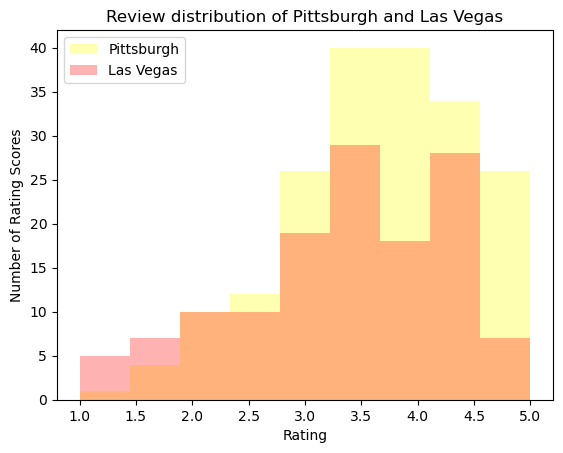

In [58]:
#Creating a histogram

plt.hist(
    pitt_stars,
    alpha = 0.3,
    color = 'yellow',
    label = 'Pittsburgh',
    bins = 'auto' #default with of bars
)

plt.hist(
    vegas_stars,
    alpha = 0.3,
    color = 'red',
    label = 'Las Vegas',
    bins = 'auto'
)

plt.xlabel("Rating")
plt.ylabel("Number of Rating Scores")

plt.legend(loc = 'best') #places legend on 'best' location according to python

plt.title("Review distribution of Pittsburgh and Las Vegas")

plt.show()

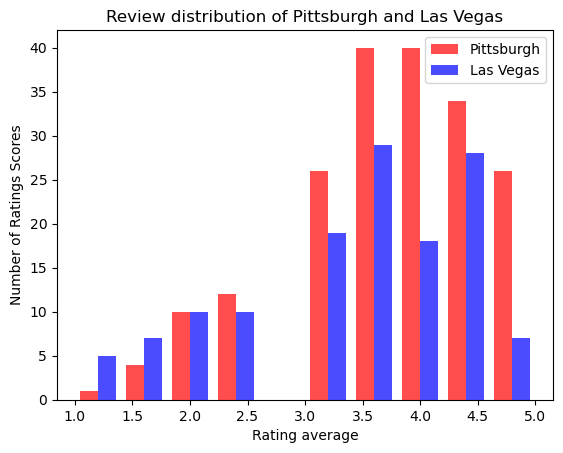

In [46]:
plt.hist(
    [pitt_stars,vegas_stars],
    alpha = 0.7,
    color = ['red','blue'],
    label = ['Pittsburgh','Las Vegas'],
    bins = 'auto'
)

plt.xlabel('Rating average')
plt.ylabel('Number of Ratings Scores')

plt.legend(loc = 'best')

plt.title("Review distribution of Pittsburgh and Las Vegas")

plt.show() 

#Histogram shows 

In [ ]:
"""*****************************SCATERPLOTS***************************************"""
#Scatterplots display a set of data points for 2 variables in an x-y plane
#Exercise: visualize review counts and star ratings for businesses in the following categories using the 'catergory_0 column'
#health and medical, fast food, breakfast & bruch

In [51]:
#We need to create new data frames for each category
df_health = df[df["category_0"] == "Health & Medical"]
df_fast = df[df["category_0"] == "Fast Food"]
df_break = df[df["category_0"] == "Breakfast & Brunch"]

df_break.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
24,Gab & Eat,Breakfast & Brunch,Sandwiches,True,69,4.5,3,1,Carnegie,PA
131,Crepes Parisiennes,Breakfast & Brunch,Creperies,True,73,4.0,8,1,Pittsburgh,PA
240,Ritters Diner,Breakfast & Brunch,American (Traditional),True,146,3.5,8,1,Pittsburgh,PA
266,The Bloomfield Sandwich Shop,Breakfast & Brunch,Sandwiches,True,41,4.0,8,1,Pittsburgh,PA
268,The Dor-Stop Restaurant,Breakfast & Brunch,Diners,True,275,4.5,8,1,Pittsburgh,PA


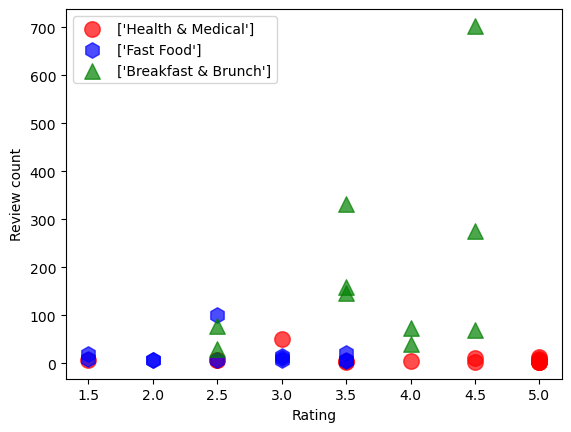

In [56]:
plt.scatter(
    df_health["stars"],
    df_health["review_count"],
    marker = "o",
    color = "r",
    alpha = 0.7, #sets opacy
    s = 124, #sets marker size
    label = ['Health & Medical']
)

plt.scatter(
    df_fast["stars"],
    df_fast["review_count"],
    marker = "h",
    color = "b",
    alpha = 0.7,
    s = 124,
    label = ["Fast Food"]
)


plt.scatter(
    df_break["stars"],
    df_break["review_count"],
    marker = "^",
    color = "g",
    alpha = 0.7,
    s = 124,
    label = ["Breakfast & Brunch"]
)


plt.xlabel('Rating')
plt.ylabel('Review count')
plt.legend(loc = 'upper left')

plt.show() #The way the data is presented might be a problem since it overlaps too much

In [ ]:
#Logarithmic scale so everything can be better visualized

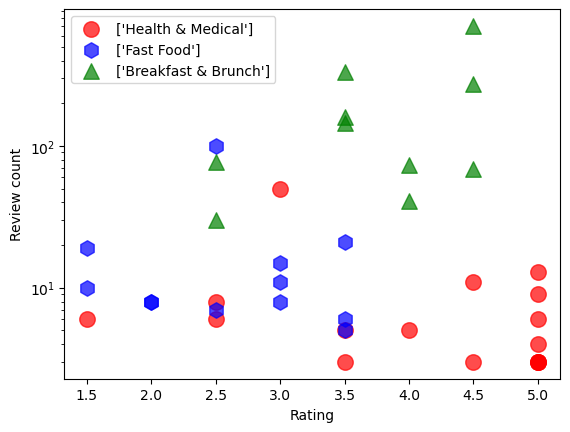

In [54]:
#logarithmic scale graph:
plt.scatter(
    df_health["stars"],
    df_health["review_count"],
    marker = "o",
    color = "r",
    alpha = 0.7, #sets opacy
    s = 124, #sets marker size
    label = ['Health & Medical']
)

plt.scatter(
    df_fast["stars"],
    df_fast["review_count"],
    marker = "h",
    color = "b",
    alpha = 0.7,
    s = 124,
    label = ["Fast Food"]
)


plt.scatter(
    df_break["stars"],
    df_break["review_count"],
    marker = "^",
    color = "g",
    alpha = 0.7,
    s = 124,
    label = ["Breakfast & Brunch"]
)


plt.xlabel('Rating')
plt.ylabel('Review count')
plt.legend(loc = 'upper left')

#making it logarithmic 
axes = plt.gca()
axes.set_yscale('log')

plt.show()